In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("iboxx_usd_lq_ig_eod_underlyings_20160125.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'iboxx_usd_lq_ig_eod_underlyings_20160125.csv'

In [3]:
df.shape

NameError: name 'df' is not defined

In [ ]:
# # 查看前几行数据
# print(df.head())

# # 查看数据结构
# print(df.info())

# # 查看数据的统计信息（数值列）
# print(df.describe())

# # 查看数据集的行数和列数
# print(df.shape)  # (行数, 列数)

# # 查看列名
# print(df.columns)

# # 检查是否有缺失值
# print(df.isnull().sum())

# # 查看数据类型
# print(df.dtypes)


In [ ]:
df.columns

Index(['Date', 'Fixing', 'Price Type', 'FX Version', 'Index ISIN_CPi',
       'Index ISIN_TRi', 'Index Name', 'ISIN', 'CUSIP', 'Identifier',
       ...
       '30+ Years', 'Daily Return', 'Month-to-Date Return',
       'Quarter-to-Date Return', 'Year-to-Date Return',
       'Daily Sovereign Curve Swap Return', 'Daily Libor Swap Return',
       'Month-to-date Sovereign Curve Swap Return',
       'Month-to-date Libor Swap Return', 'Duration weighted exposure'],
      dtype='object', length=129)

# check the nans in columns

In [ ]:
# check the nas in columns
cols_with_na = [col for col in df.columns if df[col].isna().any()]
print(cols_with_na)

['FX Version', 'Local 1', 'Local 2', 'Next Call Date', 'Simple Margin', 'Discount Margin', 'Index Ratio', 'Assumed Inflation']


In [ ]:
num_na = [df[col].isnull().sum() for col in cols_with_na]
na_rate = [df[col].isnull().sum()/df.shape[0] for col in cols_with_na]

print("---The info of nans in dataset---")
print(f"{'Col':<20}\t{'num_na':<10}\t{'na_rate':<10}")
for col, n, rate in zip(cols_with_na, num_na, na_rate):
    print(f"{col:<20}\t{n:<10}\t{rate:<10.4f}")

---The info of nans in dataset---
Col                 	num_na    	na_rate   
FX Version          	1482      	1.0000    
Local 1             	1477      	0.9966    
Local 2             	1482      	1.0000    
Next Call Date      	1478      	0.9973    
Simple Margin       	1482      	1.0000    
Discount Margin     	1482      	1.0000    
Index Ratio         	1482      	1.0000    
Assumed Inflation   	1482      	1.0000    


# check the zeros in columns

In [ ]:
# check the zeros in columns
cols_with_zero = [col for col in df.columns if df[col].eq(0).any()]
print(cols_with_zero)

['Accrued Interest', 'Coupon Payment', 'Coupon Adjustment', 'Current Redemption Payment', 'Cash Payment', 'Capped Cash Payment', 'Is Fixed to Float', 'Is Perpetual', 'Is Hybrid Capital', 'is Callable', 'Is Core index', 'Is Crossover', 'Is FRN', 'Is PIK', 'Is Zero Coupon', 'Is Sinking', '1-3 Years', '1-5 Years', '1-10 Years', '1-15 Years', '1-20 Years', '3-5 Years', '5-7 Years', '5-10 Years', '5-15 Years', '7-10 Years', '10-15 Years', '15-20 Years', '15-25 Years', '20-25 Years', '25-30 Years', '5+ Years', '7+ Years', '10+ Years', '15+ Years', '25+ Years', '30+ Years']


In [ ]:
num_zero = [df[col].eq(0).sum() for col in cols_with_zero]
zero_rate = [df[col].eq(0).sum()/df.shape[0] for col in cols_with_zero]

print("---The info of zeros in dataset---")
print(f"{'Col':<20}\t{'num_zero':<10}\t{'zero_rate':<10}")
for col, n, rate in zip(cols_with_zero, num_zero, zero_rate):
    print(f"{col:<20}\t{n:<10}\t{rate:<10.4f}")

---The info of zeros in dataset---
Col                 	num_zero  	zero_rate 
Accrued Interest    	7         	0.0047    
Coupon Payment      	1249      	0.8428    
Coupon Adjustment   	1482      	1.0000    
Current Redemption Payment	1482      	1.0000    
Cash Payment        	1249      	0.8428    
Capped Cash Payment 	1249      	0.8428    
Is Fixed to Float   	1482      	1.0000    
Is Perpetual        	1482      	1.0000    
Is Hybrid Capital   	1400      	0.9447    
is Callable         	922       	0.6221    
Is Core index       	1482      	1.0000    
Is Crossover        	1482      	1.0000    
Is FRN              	1482      	1.0000    
Is PIK              	1482      	1.0000    
Is Zero Coupon      	1482      	1.0000    
Is Sinking          	1482      	1.0000    
1-3 Years           	1482      	1.0000    
1-5 Years           	1102      	0.7436    
1-10 Years          	509       	0.3435    
1-15 Years          	475       	0.3205    
1-20 Years          	398       	0.2686    
3-5 Years    

In [ ]:
# filter out really high zero ones
high_zero_cols = [col for col, rate in zip(cols_with_zero, zero_rate) if rate > 0.97]
print(high_zero_cols)

['Coupon Adjustment', 'Current Redemption Payment', 'Is Fixed to Float', 'Is Perpetual', 'Is Core index', 'Is Crossover', 'Is FRN', 'Is PIK', 'Is Zero Coupon', 'Is Sinking', '1-3 Years', '10-15 Years', '30+ Years']


In [ ]:
single_val_cols = [col for col in df.columns if df[col].nunique() == 1]
multi_val_cols = [col for col in df.columns if df[col].nunique() > 1]
full_na_cols = [col for col in df.columns if df[col].nunique() == 0]

print(len(single_val_cols))
print(len(multi_val_cols))
print(len(full_na_cols))


24
99
6


In [ ]:
single_val_cols

['Date',
 'Fixing',
 'Price Type',
 'Index ISIN_CPi',
 'Index ISIN_TRi',
 'Index Name',
 'Ex-Dividend',
 'Coupon Adjustment',
 'Current Redemption Payment',
 'Redemption Factor',
 'PIK Factor',
 'Level 0',
 'Level 2',
 'Level 3',
 'Seniority Level 3',
 'Is Fixed to Float',
 'Is Perpetual',
 'Is Core index',
 'Is Crossover',
 'Is FRN',
 'Is PIK',
 'Is Zero Coupon',
 'Is Sinking',
 '1-3 Years']

In [ ]:
df[multi_val_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISIN                                       1482 non-null   object 
 1   CUSIP                                      1482 non-null   object 
 2   Identifier                                 1482 non-null   object 
 3   Local 1                                    5 non-null      object 
 4   Ticker                                     1482 non-null   object 
 5   Issuer                                     1482 non-null   object 
 6   Issuer Country                             1482 non-null   object 
 7   Coupon                                     1482 non-null   float64
 8   Workout date                               1482 non-null   object 
 9   Final Maturity                             1482 non-null   object 
 10  Expected Remaining Life 

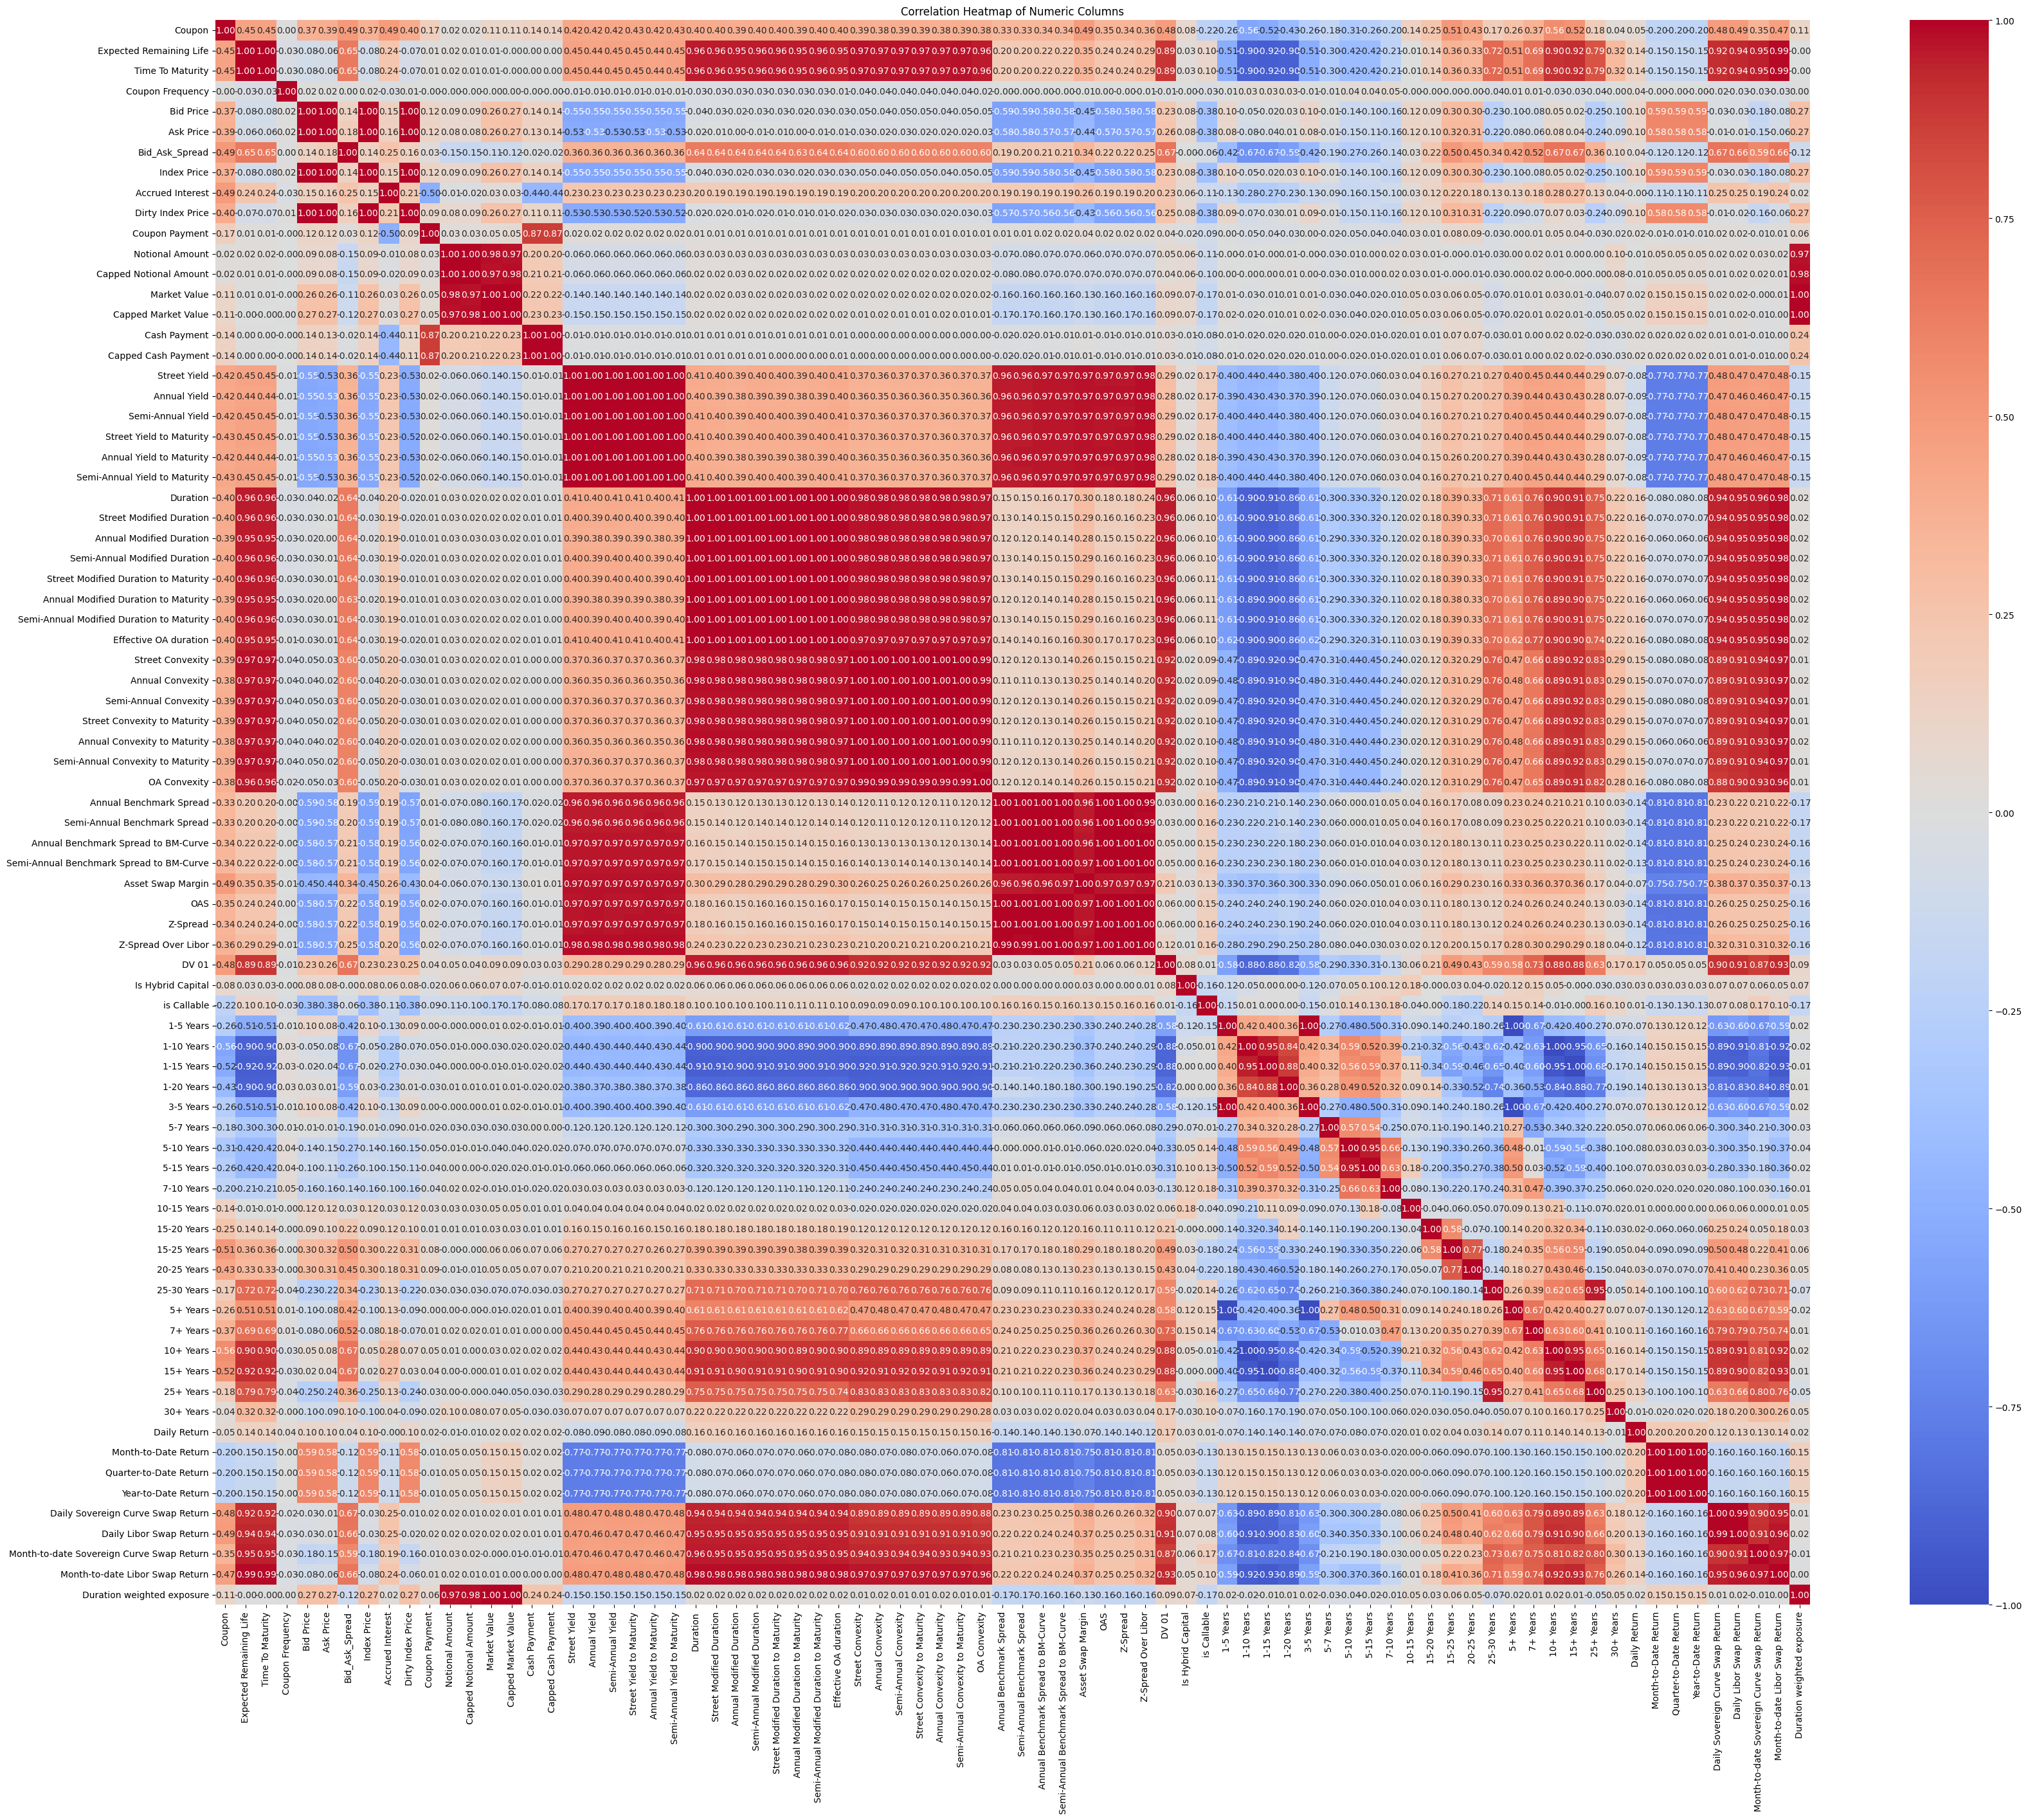

In [ ]:
# numerical cols in multi_val_cols
numeric_cols = df[multi_val_cols].select_dtypes(include=['float64', 'int64']).columns

# calculate corr_matrix
corr_matrix = df[numeric_cols].corr()

# heat map
plt.figure(figsize=(40, 32))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Columns")
plt.savefig("./temp_plt.pdf")
plt.show()

In [ ]:
high_corr = np.where((corr_matrix > 0.8) | (corr_matrix < -0.8))

# print high_corr pairs
for i, j in zip(high_corr[0], high_corr[1]):
    if i != j: # exclue itself
        print(f"high corr: {df.columns[i]} and {df.columns[j]}, corr: {corr_matrix.iloc[i, j]:.2f}")

high corr: Fixing and Price Type, corr: 1.00
high corr: Fixing and Bid Price, corr: 0.96
high corr: Fixing and Ask Price, corr: 0.96
high corr: Fixing and Bid_Ask_Spread, corr: 0.95
high corr: Fixing and Index Price, corr: 0.96
high corr: Fixing and Accrued Interest, corr: 0.96
high corr: Fixing and Dirty Index Price, corr: 0.95
high corr: Fixing and Ex-Dividend, corr: 0.96
high corr: Fixing and Coupon Payment, corr: 0.95
high corr: Fixing and Coupon Adjustment, corr: 0.97
high corr: Fixing and Current Redemption Payment, corr: 0.97
high corr: Fixing and Redemption Factor, corr: 0.97
high corr: Fixing and PIK Factor, corr: 0.97
high corr: Fixing and Notional Amount, corr: 0.97
high corr: Fixing and Capped Notional Amount, corr: 0.97
high corr: Fixing and Market Value, corr: 0.96
high corr: Fixing and Semi-Annual Yield to Maturity, corr: 0.89
high corr: Fixing and Street Modified Duration, corr: -0.90
high corr: Fixing and Annual Modified Duration, corr: -0.92
high corr: Fixing and Semi

# transfer the * Years columns back into catego